In [1]:
# !pip install sentence_transformers
# !pip install umap-learn

# !pip install umap-learn[plot]
# !pip imatplotlibnstall holoviews
# !pip install -U ipykernel

In [1]:
from sentence_transformers import SentenceTransformer

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score



In [2]:

# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))


In [18]:
print('original text tokens: ' ,len(corpus[0]))

print('text:',corpus[0])
print('text label:',labels[0])

original text tokens:  695
text: From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

text label: 7


In [19]:

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)


In [5]:
print(embeddings.shape)

(2000, 384)


In [6]:
# Create UMAP model with n_components=2
# reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=20)
reducer = umap.UMAP(n_neighbors=30, min_dist=0.001)

# Fit and transform the data
embedding = reducer.fit_transform(embeddings)


In [20]:
embedding.shape

(2000, 2)

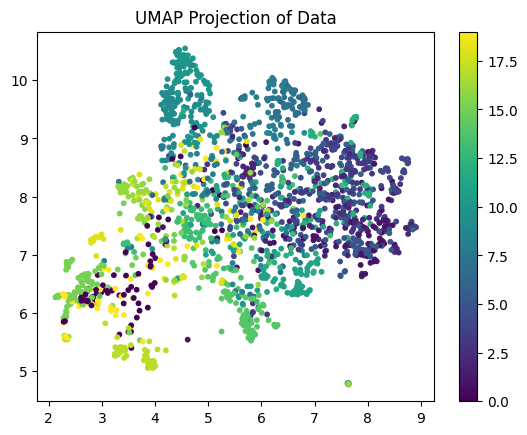

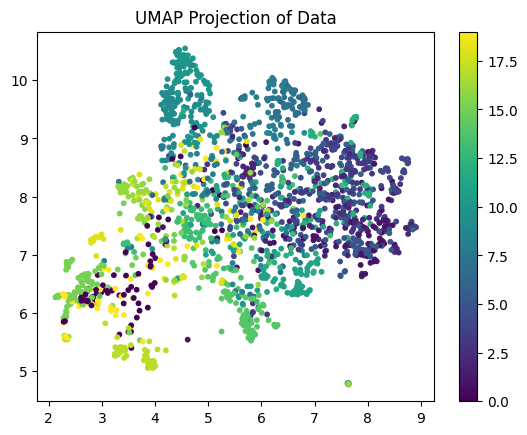

In [8]:

# Scatter plot the results
# Scatter plot the results
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)
plt.title('UMAP Projection of Data')
plt.colorbar()
plt.show()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)
plt.title('UMAP Projection of Data')
plt.colorbar()
plt.show()

In [9]:
# Number of clusters (replace with the actual number of classes in your data)
num_clusters = 20

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embedding)


/home/oussama/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
print(kmeans_labels.shape)

(2000,)


In [11]:
# Evaluate the results using Adjusted Rand Score
ari = adjusted_rand_score(labels, kmeans_labels)
print(f"Adjusted Rand Score: {ari}")


Adjusted Rand Score: 0.2686714942814573


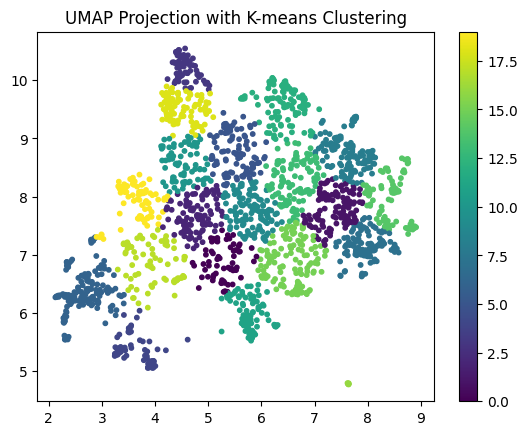

In [12]:
# Scatter plot with colors representing k-means clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('UMAP Projection with K-means Clustering')
plt.colorbar()
plt.show()


In [13]:

# Evaluate clustering results
nmi_score = normalized_mutual_info_score(kmeans_labels, labels)
ari_score = adjusted_rand_score(kmeans_labels, labels)
method = 'umap'
# Print results
print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

Method: umap
NMI: 0.45 
ARI: 0.27



In [14]:
pwd

'/home/oussama/Downloads/exam_project/notebooks'

## save reducer transformer as a pickle model 

In [15]:
# Save the UMAP model using pickle
import pickle
with open('../models/reducers/umap_model.pkl', 'wb') as file:
    pickle.dump(embedding, file)

In [17]:
# Save the UMAP model using pickle
import pickle
with open('../models/K-means/kmeans_umap.pkl', 'wb') as file:
    pickle.dump(kmeans_labels, file)

In [24]:
import joblib
# Fetch 20 newsgroups data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# Save the data locally
data_to_save = {
    'corpus': corpus,
    'labels': labels,
    'k': k
}

joblib.dump(data_to_save, '../data/ng20_data.joblib')


['../data/ng20_data.joblib']

In [30]:
# Load the data from the local file
loaded_data = joblib.load('../data/ng20_data.joblib')

# Retrieve the variables
loaded_corpus = loaded_data['corpus']
loaded_labels = loaded_data['labels']
loaded_labels[0]

7